<a href="https://colab.research.google.com/github/mwithgod3952/ML_jh/blob/master/class_code3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://images.emojiterra.com/openmoji/v13.1/512px/2699.png" width="100"/><font size = 4><font color = 'grey'> <b><i>환경설정</i></b></font>

In [ ]:
from google.colab import drive; drive.mount('/content/drive', force_remount=True)
from IPython import display; display.clear_output()

wp = input('- 작업경로를 입력해주세요: '); print('\n'); display.clear_output()

import os; os.chdir(wp)
if os.getcwd() == wp:
    print(f'\t\033[1mMounted at{new_path}\033[0m\n')  
    print('\t\033[1mThe working path is stored in variable \033[91mwp\033[0m')

	Mounted atdisplay.clear_output()

	The working path is stored in variable wp


---

<img src="https://images.emojiterra.com/openmoji/v13.1/512px/1f3af.png" width="75"><font size = 4><font color = 'grey'> <b><i>학습목표</i></b></font>

<font size =5>1.</font>
<font size=2><font color = 'blue'> <b>데이터프레임 구조이해와 생성 (데이터의 구조변환)</b></font> 

<font size =5>2.</font>
<font size=2><font color = 'blue'> <b>딕셔너리와 리스트, 리스트와 시리즈</b></font> 

<fnot size = 10><font color = 'white'>.</font>


---

<font size = 2>**Homework**: 아래의 pandas 공식페이지에 들어가 "10 minutes to pandas" 코드를 카피코딩 해봅시다.</font>

<font size = 2>pandas library는 데이터 추출, 처리, 분석 분야에 있어 필수적입니다. 아래의 링크를 통해 확인할 수 있는 문서의 코드를 카피 코딩하며 데이터라는 것이 어떤 형식과 방식으로 사용되는지를 학습해 봅시다.</font>

> <font size = 2>**[Link](https://pandas.pydata.org/docs/user_guide/10min.html)**</font>

---

In [ ]:
import os
import copy
import random
import numpy as np
import pandas as pd

from google.colab import data_table

import warnings 
warnings.filterwarnings('ignore')

<fnot size = 10><font color = 'white'>.</font>

<img src="https://images.emojiterra.com/twitter/v13.1/512px/1f4ca.png" width="100"><font size = 4><font color = 'grey'> <b><i> 데이터 준비</i></b></font>

In [ ]:
# 공유파일 URL: https://drive.google.com/file/d/1wu8Zoowp96csMfEuCNRkA3LQGWLyS0Un/view?usp=sharing
URL = input('공유받고자 하는 파일의 링크를 입력해주세요.: ')

!pip install -U -q PyDrive
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
filename = input('저장하고자 하는 파일의 이름을 입력해 주세요. (확장자명 제외): ')
display.clear_output()

shared_drv_id = URL[URL.find('/d/'):].split('/')[2]
drive.CreateFile({'id':shared_drv_id}).GetContentFile(f'{os.getcwd()}/{filename}.csv') 
i = 0
for fi in os.listdir():
    if i == 0:
        if filename in fi:
            print('\n')
            print('*'*1); print('\t\033[1mNew data has been created\033[0m');
            i += 1 
if i > 0:
    df = pd.read_csv(f'{filename}.csv').iloc[:, 1:]
    print('*'*2); print('\t\033[1mThe file is stored in variable \033[91mdf\033[0m');



*
	New data has been created
**
	The file is stored in variable df


In [ ]:
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

,키워드,출처,카테고리,검색량,상품량,경쟁률,쇼핑전환
0,헬스장,상품,피트니스/PT,307600.0,473360.0,1.53,0.76
1,헬스,상품,웨이트용품,61210.0,9333156.0,152.47,0.62
2,벨트,상품,정장벨트,36360.0,9646001.0,265.29,0.10
3,디자인,상품,디자인문패,24420.0,21640053.0,886.16,0.27
4,학과,상품,기타교구,19400.0,16837.0,0.86,0.00
5,마네킹,인기,마네킹,13800.0,270619.0,19.61,3.72
6,디스플레이,상품,모니터,12570.0,5074783.0,403.72,0.06
7,여성,상품,중목/장목양말,9430.0,255894816.0,27136.24,0.08
8,가정용런닝머신,상품,접이식,9200.0,55649.0,6.04,2.47
9,러닝머신,상품,접이식,9040.0,198830.0,21.99,1.58


    우리는 공유받은 csv 파일을 url 형태로 공유받아 이를 'df'라는 변수에 'Pandas' Library의 'DataFrame'이라는 데이터 타입으로 저장하였어요.

<font size = 2><font color = 'grey'>*** 우리가 비록 DataFrame을 처음 접했을지라도 구조를 천천히 살펴보아요. 기존에 공부했던 데이터 자료형들과는 어떤 차이가 있는지 또, DataFrame만이 가지고 있는 특징은 어떤 것들이 있을지 함께 토론해봐요 :)**</font>

# <font size = 4><b>1. 데이터프레임 구조이해와 생성(데이터의 구조변환)</b></font>

## <font color = 'red'>***Q***</font><font size = 3>**: 데이터프레임의 각 열과 행은 무엇으로 구분할 수 있나요?**</font>

---

### <font size=3><font color = 'grey'>**1. 먼저 데이터프레임의 '열'은 '열의 이름'으로 구분지을 수 있어요.**</font>

<iframe src="https://cdn.britannica.com/72/232772-050-4E3D86CC/mind-blown-emoji-head-exploding-emoticon.jpg" width="600" height="300"></iframe>

> <font size=2><font color = 'blue'>**먼저 데이터의 모든 열의 이름을 불러보죠. .columns라는 함수를 변수 df에 바로 적용하여 열의 이름을 불러와보겠습니다.**</font>

> <font size=2><font color = 'blue'>**.columns 함수를 통해 불러온 전체 열의 정보와, 각, 열의 데이터 타입은 어떤 형태로 저장되어 있는지도 알아보죠 ![An image](https://cdn.dribbble.com/users/1179659/screenshots/4128574/media/4c17d841e4437eaab777b1df30f8779d.gif)**</font>

In [ ]:
colname = df.columns
print('DataType: {:}\n'.format(type(colname)))
colname

DataType: <class 'pandas.core.indexes.base.Index'>



Index(['키워드', '출처', '카테고리', '검색량', '상품량', '경쟁률', '쇼핑전환'], dtype='object')

In [ ]:
i = 0
for ci in colname:
    print('\t {:} | \033[1m{:<5}\033[0m{:>5}'.format(type(ci), f'col{i}', ci))
    i += 1
print('\n')

	 <class 'str'> | col0   키워드
	 <class 'str'> | col1    출처
	 <class 'str'> | col2  카테고리
	 <class 'str'> | col3   검색량
	 <class 'str'> | col4   상품량
	 <class 'str'> | col5   경쟁률
	 <class 'str'> | col6  쇼핑전환




<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2>**class str 형태의 각 열 이름이 class .Index 형태로 함께 저장되어 있는 것 을 확인할 수 있어요.**</font>

<font color = 'crimeson'><font size = 2>**더불어, 이것을 꼭 기억해 두세요. 프로그래밍에서 인덱스는 데이터의 색인과 같은 역할을 해요. 인덱스를 생성하면 데이터 검색을 빠르게 할 수 있는 경우가 있어요.**</font> 

<font color = 'grey'><font size = 2>즉, .columns 함수를 사용하여 추출할 수 있는 열의 이름들은 이름과 함께 순서가 정다는 것이 특징입니다. [ex]'키워드' 열은 0번째, '출처' 열은 1번째에 위치해 있습니다.</font>
    

> <font size=2><font color = 'blue'>**먼저 데이터의 모든 열의 이름을 변경해보죠. .rename 이라는 함수를 사용하여 기존 열의 이름을 우리가 원하는 새로운 이름으로 바꿔보겠습니다.**</font>

In [ ]:
new_col_name = {
    colname[0]: 'keyword',
    colname[1]: 'source',
    colname[2]: 'category',
    colname[3]: 'search volume',
    colname[4]: 'quantity',
    colname[5]: 'competition_rate',
    colname[6]: 'purchase_conversion'}

df = df.rename( columns = new_col_name )

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2>**Python Dictionary에 Key 값에는 기존의 열 이름을, Value 값에는 바꾸고자 하는 열의 이름을 지정하여 저장한 뒤, .rename 함수를 사용하여 열의 이름을 변경할 수 있어요.**</font>


---

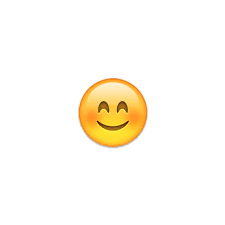
<font color = 'crimson'><font size = 2>* Dictionary의 특징에는 어떤 것들이 있었나요?.</font>

    - Dictionary를 사용하여 Key : Value를 함께 지정하여 저장할 수 있어요(Pair).
    - Dictionary는 순서를 지정하여 저장해요. 그래서, Key값을 딱 지정하여 데이터를 추출할 수도 있지만 저장된 Key의 순서를 활용할 수도 있답니다.

In [ ]:
if  new_col_name[list(new_col_name.keys())[0]] == new_col_name[colname[0]]:
    print(f'\n\t {new_col_name[list(new_col_name.keys())[0]]}')


	 keyword


---

> <font size=2><font color = 'blue'>**이번에는 지정된 열 데이터의 색인(Index)를 활용하여 열 이름을 바꿔볼까요?**</font>

    1) .shape함수를 통해 데이터프레임의 열의 크기와 행의 크기를 확인해봅시다.

In [ ]:
data_shape = df.shape

print(f'\n\t- 행의 수: {data_shape[0]}')
print(f'\t- 열의 수: {data_shape[1]}')


	- 행의 수: 37
	- 열의 수: 7


    2) 열의 크기 7만큼을 반복하여 Index를 추출 및 활용하여 열의 이름을 변경해보겠습니다.

In [ ]:
new_columns = ['keyword', 'source', 'category', 'search volume', 'quantity', 'competition_rate', 'purchase_conversion']
df = pd.read_csv(f'{filename}.csv').iloc[:, 1:]

for i in range(data_shape[1]):
    df.columns.values[i] = new_columns[i]

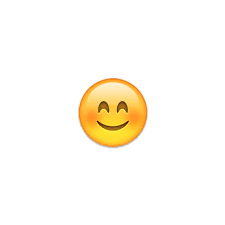
<font color = 'crimson'><font size = 2>* 위에서 확인했던 것과 같이, .columns 함수를 통한 출력된 결과는 class .Index 형태입니다. 아직까지는 print를 통해 확인할 수 있는 일반적인 결과값 뿐 아니라 Index로서의 기능이 포함된 상태임을 유의해야해요.</font>

<font size = 2>**이런 이유로,** 열 데이터의 정보를 바꾸어주기 위해서는, .value 함수를 추가적으로 연결하여 우리가 원하는 데이터 만을 추출 후 변경해주어야하죠 :)</font>

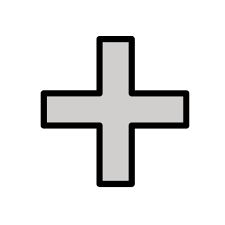
<font color = 'grey'><font size = 2>.columns.vlues의 DataType은 array에요 :)</font>

In [ ]:
df.columns.values

array(['keyword', 'source', 'category', 'search volume', 'quantity',
       'competition_rate', 'purchase_conversion'], dtype=object)

In [ ]:
type(df.columns.values)

numpy.ndarray

<img src="https://t3.ftcdn.net/jpg/04/55/55/86/360_F_455558670_uAQfvqw8cT8erAExftZUlNV5H37fqJL5.jpg" width="40"/> 
<font color = 'grey'><font size = 2>**"Array"**는 **"배열"**이에요.</font> 

<font color = 'grey'><font size = 2>배열 형태의 데이터는 특히 공학, Ai 분야에서 데이터를 활용할 때에 굉장히 중요하게 다루어지는 형태에요.</font>

<font color = 'grey'><font size = 2>***(구체적인 학습은 수업의 마지막에 진행할께요 !)***</font>

> <font size=2><font color = 'blue'>**먼저 데이터프레임의 열 이름이 우리가 지정했던 대로 잘 변경되었는지 확인해 보아요 :)**</font>

In [ ]:
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

,keyword,source,category,search volume,quantity,competition_rate,purchase_conversion
0,헬스장,상품,피트니스/PT,307600.0,473360.0,1.53,0.76
1,헬스,상품,웨이트용품,61210.0,9333156.0,152.47,0.62
2,벨트,상품,정장벨트,36360.0,9646001.0,265.29,0.10
3,디자인,상품,디자인문패,24420.0,21640053.0,886.16,0.27
4,학과,상품,기타교구,19400.0,16837.0,0.86,0.00
5,마네킹,인기,마네킹,13800.0,270619.0,19.61,3.72
6,디스플레이,상품,모니터,12570.0,5074783.0,403.72,0.06
7,여성,상품,중목/장목양말,9430.0,255894816.0,27136.24,0.08
8,가정용런닝머신,상품,접이식,9200.0,55649.0,6.04,2.47
9,러닝머신,상품,접이식,9040.0,198830.0,21.99,1.58


<font color = 'white'><font size = 10>.</font>

<img src="https://cdn-0.emojis.wiki/emoji-pics/facebook/man-teacher-facebook.png" width=100/><font size = 2>**정리해봅시다.**</font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2>**Dictionary를 통해 데이터프레임의 Column명을 변경할 수 있어요.**</font>

> <font color = 'grey'><font size = 2>(더불어, Dictionary는 Key값의 **순서**를 지정하여 Value 저장한다는 것도 배웠어요.)</font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2>**Index를 활용하여 Column명을 변경할 수도 있어요.**</font>

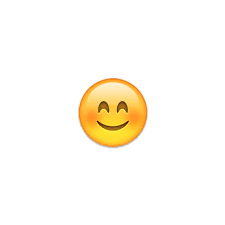
<font color = 'crimson'><font size = 2>* 여기서 주의!    Column data 그 자체가 Index 값을 함께 가지고 있기 때문에, .value 함수를 함께 붙여야만 데이터를 지정하고 변경할 수 있었어요.</font>

<img src="https://t3.ftcdn.net/jpg/04/55/55/86/360_F_455558670_uAQfvqw8cT8erAExftZUlNV5H37fqJL5.jpg" width="40"/> 
<font color = 'red'><font size = 2>**이제 감이 오시나요! Column명 변경을 위해, Dictionary를 활용할 수 있었던 이유, .column함수 활용 시 .value를 함께 고려해야만 했던 것 모두, 눈에 보이진 않지만 Column명과 함께 저장되어 있는 데이터의 '색인(Index)'를 활용하기 때문에 가능했던 거에요 :)**</font>


---

> <font size=2><font color = 'blue'>**우선 변경한 내용도 있으니 데이터프레임을 새롭게 .csv 파일로 저장해보죠**</font>

In [ ]:
new_fnm = f'{filename}_2.csv'
df.to_csv(new_fnm)

> <font size=2><font color = 'blue'>**파일이 정상적으로 저장되었는지 확인해보아요**</font>

In [ ]:
new_fnm in os.listdir(os.getcwd())

True

<font color = 'white'><font size = 30>***------***</font>

### <font size=3><font color = 'grey'>**2. 데이터프레임의 '행'은 오직 '행의 색인'으로 구분지을 수 있어요.**</font>

<font color = 'white'><font size = 2>.</font>

> <font size=2><font color = 'blue'>**우선 보기에 편하도록 데이터 중 상단 5개 행(row)만을 출력시켜보아요. .head() 함수를 사용해여 출력하면 기본적으로 5개의 행이 출력되어요.**</font>

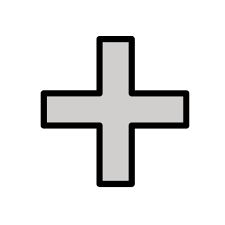
<font color = 'grey'><font size = 2>더 많거나 더 적은 수의 행을 출력하고 싶다면, 괄호 안에 원하는 만큼의 숫자를 입력하면 되요.</font>

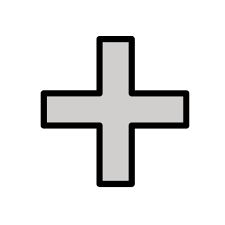<font color = 'grey'><font size = 2> 아래부터 행을 추출하고 싶을 때는 .tail 함수를 사용하기도 하죠 :)</font>

In [ ]:
df.head()

,keyword,source,category,search volume,quantity,competition_rate,purchase_conversion
0,헬스장,상품,피트니스/PT,307600.0,473360.0,1.53,0.76
1,헬스,상품,웨이트용품,61210.0,9333156.0,152.47,0.62
2,벨트,상품,정장벨트,36360.0,9646001.0,265.29,0.10
3,디자인,상품,디자인문패,24420.0,21640053.0,886.16,0.27
4,학과,상품,기타교구,19400.0,16837.0,0.86,0.00


<font color = 'white'><font size = 2>.</font>

<img src="https://img.freepik.com/premium-vector/cute-funny-think-emoji-smile-face-with-question-mark-vector-flat-line-doodle-cartoon-kawaii-character-illustration-icon-isolated-white-background-yellow-emoji-circle-think-character-concept_92289-3170.jpg" width='50'/><img src="https://gifimage.net/wp-content/uploads/2018/10/3-min-gif-4.gif" width='100'/><font size = 3> **데이터를 보면서 잠깐 함께 토론해봐요**</font>
<font size = 2><u>행(Row)만이 가지고 있는 큰 차이점은 무엇일까요?</u></font>

<font color = 'white'><font size = 2>.</font>

---



<font size =5>1.</font>
<font size=2><font color = 'blue'> **먼저 .head()함수를 사용해 첫 번째와 두 번째 행을 추출해볼꺼에요.**</font> 

In [ ]:
df.head(1)

,keyword,source,category,search volume,quantity,competition_rate,purchase_conversion
0,헬스장,상품,피트니스/PT,307600.0,473360.0,1.53,0.76


<font size =5>2.</font>
<font size=2><font color = 'blue'> **이번엔, values 함수를 사용하여 데이터 하나하나를 출력 해 볼께요.**</font>

In [ ]:
df.head(1).values[0]

array(['헬스장', '상품', '피트니스/PT', 307600.0, 473360.0, 1.53, 0.76],
      dtype=object)

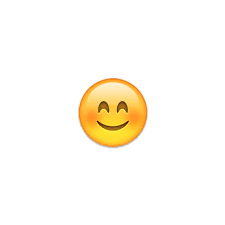
<font color = 'crimson'><font size = 2>* 여기서 주의!    .values 뒤에 [0]를 붙여주었어요. 즉. index를 지정해주었죠. 왜 일까요?</font>

<font color = 'white'><font size = 2>.</font>

</font><img src="https://us.123rf.com/450wm/dragontiger8/dragontiger81907/dragontiger8190700062/127897173-%EB%AC%B8%EC%A0%9C%EC%97%90-%EB%8C%80%ED%95%B4-%EC%9D%B4%EC%95%BC%EA%B8%B0%ED%95%98%EB%8A%94-%EB%91%90-%EC%82%AC%EB%9E%8C-%EC%86%90%EC%9C%BC%EB%A1%9C-%EA%B7%B8%EB%A6%B0.jpg?ver=6" width="130"/><font color = 'grey'><font size=4><b><i>HINT</i></b>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2> 기억하나요! 자료형 '리스트'를 공부할 때, <u>리스트 안에 <b>리스트를 하나의 데이터로서  저장할 수 있다고 하였어요.</b></u></font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2> 위의 코드셀에서 인덱싱 [0]의 결과 값이 어떠했죠? <u>첫 번째 데이터인 '헬스장이 출력될꺼란 예상과는 달리 첫 번째 행의 전체 데이터가 추출되었어요</u></font>

<font color = 'crimeson'><font size = 2>위와 같은 사실들로서 우리가 추리해 볼 수 있는 것은, <b>행(Row)의 데이터</b>는 하나 하나 개별단위로 존재하기 이전에 <b>하나의 덩어리 형태로 저장</b>된다는 점이에요.</font> 



---

<font size = 4><font color = 'crimson'>***Q.***</font><font color = 'grey'><font size = 3> **<i>그럼, 행 데이터에서 덩어리 속 각 하나하나의 데이터들은 무엇을 통해 구분되어지고 저장되어졌을까 ?</i>**</font>

<img src="https://t3.ftcdn.net/jpg/04/55/55/86/360_F_455558670_uAQfvqw8cT8erAExftZUlNV5H37fqJL5.jpg" width="40"/><font size = 3><font color = 'crimeson'><b> 중요해요 !</b></font>

> <font size = 4><font color = 'crimson'>***A.***</font><font size = 2> **열(Column) 정보를 Key 값으로 활용하여 구분되어져 저장되어있어요.**</font>


---

> <font size=2><font color = 'blue'>**.keys()함수를 활용하여 정보를 추출했을 때, 행에 대해 어떤 정보를 추출해주는지 확인해 볼까요?**</font>


In [ ]:
df.head(1).keys()

Index(['keyword', 'source', 'category', 'search volume', 'quantity',
       'competition_rate', 'purchase_conversion'],
      dtype='object')

<img src="https://i.pinimg.com/originals/8a/dd/cd/8addcd0dad97ceac659e066944a771fa.gif" width="150"/>

<font color = 'whithe'><font size = 3>.</font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2> 행을 이루는 데이터들의 순서에 맞추어 열의 이름들을 <u><font color = 'crimeson'><font size = 4><b>덩어리</b></font> <font color = 'black'>형태로 반환해주고 있어요.</u></font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2> 더불어, 모든 행은 동일한 열 이름을 공유하죠.</font> 

> <font size = 2><b><u>우리가 많은 행들을 추출하더라도</u> 특별히 열 정보를 제한하거나 선택하지 않는 이상 <u>모든 경우에 동일한 열의 이름들이 덩어리 형태로 반환될꺼에요.</u></b></font>

In [ ]:
df.keys() == df.head(1).keys()

array([ True,  True,  True,  True,  True,  True,  True])

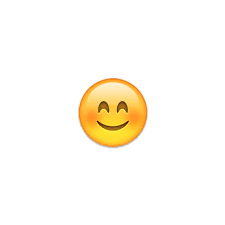
<font color = 'crimson'><font size = 2>* 위와 같은 형태는 dictionary에서도 동일하게 확인할 수 있어요.</font>

In [ ]:
dic = {}
i = 0
for ki in df.keys():
    dic[ki] = df.head(1).values[0][i]
    i += 1    

dic    

{'keyword': '헬스장',
 'source': '상품',
 'category': '피트니스/PT',
 'search volume': 307600.0,
 'quantity': 473360.0,
 'competition_rate': 1.53,
 'purchase_conversion': 0.76}

In [ ]:
dic.keys()

dict_keys(['keyword', 'source', 'category', 'search volume', 'quantity', 'competition_rate', 'purchase_conversion'])

In [ ]:
dic.values()

dict_values(['헬스장', '상품', '피트니스/PT', 307600.0, 473360.0, 1.53, 0.76])

<font color = 'white'><font size = 10>.</font>

<img src="https://cdn-0.emojis.wiki/emoji-pics/facebook/man-teacher-facebook.png" width=100/><font size = 2>**정리해봅시다.**</font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2><b><u>데이터프레임의 행(row)는 오직 행의 색인(Index)를 통해서만 구분할 수 있어요.</u> 이것이, 행의 값들을 .value 함수를 통해 출력하려고 할 때, <u>데이터 하나하나를 바로 활용할 수 없는 이유에요.</u> <img src="https://www.emojiall.com/en/header-svg/%F0%9F%A5%B9.png" width="30"/> 데이터가 <font size=4><font color = 'crimson'>덩어리</font> <font size = 2>형태로 출력되기 때문이죠.</b></font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 3><b>그러나,</font> <font size = 2><font color = 'blue'>Pandas</font>의 데이터프레임은 <u>열의 정보를 <font color = 'crimson'>Key</u></font>값으로서 활용하기 때문에 데이터를 쉽게 구분하고 관리할 있어요. :)</b></font>

---

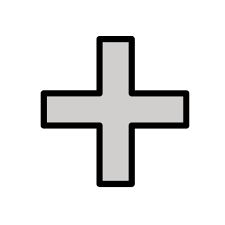
<font color = 'grey'><font size = 2>열(Column) 정보를 Key 값으로 활용하는 성질을 활용해 우리는,</font>


<font size =5>1.</font>
<font size=2><font color = 'blue'> <b>여러 개의 Dictionary를 병합하여 데이터프레임을 만들어 낼 수 있어요.</b></font> 

> <font color = 'grey'><font size = 2>지난 시간, URL과 함께 파이썬 안에서 데이터를 받을 수 있는 방법을 공부했어요. 이번 시간에는, <u>확장자가 .txt 파일</u>을 공유받아, <b><font color = 'black'>pickle 라이브러리</b></font>를 통해 데이터를 활성화시켜 봅시다.</font>

In [ ]:
URL = 'https://drive.google.com/file/d/1-gytVFIRawF0aCqBzlaPJ1pScAZMNbmH/view?usp=sharing'
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
shared_drv_id = URL[URL.find('/d/'):].split('/')[2]
drive.CreateFile({'id':shared_drv_id}).GetContentFile(f'{os.getcwd()}/{filename}.txt') 

import pickle
with open(f'{filename}.txt', 'rb') as f:
    T = pickle.load(f)

> <font color = 'grey'><font size = 2>.txt 파일에는 <b><font color = 'black'>"리스트"가 저장되어 있어요.</font></b> 리스트 안에는 <u><font color = 'black'>여러 개의 dictionary가 저장</font></u>되어 있어요.</font>

In [ ]:
print(T[1])
print(T[2])
print(T[7])

{'keyword': '헬스', 'source': '상품', 'category': '웨이트용품', 'search volume': 61210.0, 'quantity': 9333156.0, 'competition_rate': 152.47, 'purchase_conversion': 0.62}
{'keyword': '벨트', 'source': '상품', 'category': '정장벨트', 'search volume': 36360.0, 'quantity': 9646001.0, 'competition_rate': 265.29, 'purchase_conversion': 0.1}
{'keyword': '여성', 'source': '상품', 'category': '중목/장목양말', 'search volume': 9430.0, 'quantity': 255894816.0, 'competition_rate': 27136.24, 'purchase_conversion': 0.08}


> <font color = 'grey'><font size = 2><u>여러 개의 dictionary는 데이터 프레임의 열 정보를 Key값으로 활용하고 있어요. <b><font color='black'><font size=3> '같은 데이터'</font></b>, <b><font color='black'><font size=3>'같은 순서'</font></b>를 공유하고 있는 것이죠.</u></font>


<img src="https://t3.ftcdn.net/jpg/04/55/55/86/360_F_455558670_uAQfvqw8cT8erAExftZUlNV5H37fqJL5.jpg" width="40"/><font color = 'crimeson'><font size = 2><b>위와 같은 여러개의 dictionary를 list로 묶으면 데이터프레임을 바로 생성해낼 수 있어요</b></font>

In [ ]:
pd.DataFrame(T).head()

,keyword,source,category,search volume,quantity,competition_rate,purchase_conversion
0,헬스장,상품,피트니스/PT,307600.0,473360.0,1.53,0.76
1,헬스,상품,웨이트용품,61210.0,9333156.0,152.47,0.62
2,벨트,상품,정장벨트,36360.0,9646001.0,265.29,0.10
3,디자인,상품,디자인문패,24420.0,21640053.0,886.16,0.27
4,학과,상품,기타교구,19400.0,16837.0,0.86,0.00


    매일 매일 새로운 데이터가 모이여지는 상황이라면, 매일 세로운 데이터프레임을 생성하는 것 보다 dictionary 형태로 저장하며 관리하는 것이 좋아요 :)

<font size =5>2.</font>
<font size=2><font color = 'blue'> <b>.iterrows() 함수를 활용하면, 행 단위로 loop문 활용이 가능해요.</b></font>

> <font size = 2><u><b>만약,</b> iterrows()와 '반복문'을 함께 활용하여, 데이터프레임의 행의 수{len(df)} 만큼을 '루핑 작업'하면</u>, <b>i</b>번 반복할 때마다 <b>"행의 색인(Index)"</b>와 <b>"열 이름들"</b>, <b>"해당 행위 모든 값들"</b>을 함께 출력할 수 있어요.</font>

In [ ]:
for idx, row in df.iterrows():
    print(f'\033[1mrow: \033[0m {idx}')
    for ii, ri in zip(row.index, row):
        print(f'\t{ii}: {ri}')
    
    print('\n')

    if idx == 1:
        break

row:  0
	keyword: 헬스장
	source: 상품
	category: 피트니스/PT
	search volume: 307600.0
	quantity: 473360.0
	competition_rate: 1.53
	purchase_conversion: 0.76


row:  1
	keyword: 헬스
	source: 상품
	category: 웨이트용품
	search volume: 61210.0
	quantity: 9333156.0
	competition_rate: 152.47
	purchase_conversion: 0.62




<font color = 'white'><font size = 30>.</font>

<img src="https://img.freepik.com/premium-vector/cute-funny-think-emoji-smile-face-with-question-mark-vector-flat-line-doodle-cartoon-kawaii-character-illustration-icon-isolated-white-background-yellow-emoji-circle-think-character-concept_92289-3170.jpg" width='50'/><img src="https://gifimage.net/wp-content/uploads/2018/10/3-min-gif-4.gif" width='100'/><font size = 3> <b>잠깐 생각하는 시간을 가져요. 데이터프레임의 행과 열은 서로에게 어떤 역할이 되어주고 있었죠 ?</b></font>


<font color = 'white'><font size = 30>.</font>

---

## <font color = 'red'><b><i>Q</b></i></font><font size = 3><b>: 데이터프레임의 열과 행의 성질을 이용하여 데이터프레임을 만들려면 어떻게 해야 할까?</b></font>

<font size =5>1.</font>
<font size=2><font color = 'blue'> <b>여러 개의 Dictionary를 병합하여 데이터프레임을 만들어 낼 수 있어요.</b></font> 

<font size =5>2.</font>
<font size=2><font color = 'blue'> <b>각 행들의 데이터 및 행의 순서를 조합하여 생성한 Array를 사용해 데이터프레임을 만들어 낼 수 있어요.</b></font> 


In [ ]:
pd.DataFrame(data=np.array([[4, 5, 2],
                            [5, 4, 3],
                            [6, 3, 4],
                            [3, 0, 2],
                            [1, 2, 7]]),
             columns = ['Mango', 'Apple', 'Banana'])

,Mango,Apple,Banana
0,4,5,2
1,5,4,3
2,6,3,4
3,3,0,2
4,1,2,7


<font size =5>3.</font>
<font size=2><font color = 'blue'> <b>열 이름을 기준으로 데이터를 조합하여 생성한 dictionary를 사용해 데이터프레임을 만들어 낼 수 있어요.</b></font> 

<img src="https://www.datasciencemadesimple.com/wp-content/uploads/2020/05/create-series-in-python-pandas-0.png?ezimgfmt=ng%3Awebp%2Fngcb1%2Frs%3Adevice%2Frscb1-1" width="600"/>

In [ ]:
dic = {
    'Mango' :[4,5,6,3,1],
    'Apple' :[5,4,3,0,2],
    'Banana':[2,3,4,2,7]
}
pd.DataFrame(dic)

,Mango,Apple,Banana
0,4,5,2
1,5,4,3
2,6,3,4
3,3,0,2
4,1,2,7


---

## <font color = 'red'><b><i>Q</b></i></font><font size = 3><b>: 데이터프레임의 열과 행의 위치를 바꾸어 활용할 순 없을까? <img src="https://img.freepik.com/premium-vector/cute-funny-think-emoji-smile-face-with-question-mark-vector-flat-line-doodle-cartoon-kawaii-character-illustration-icon-isolated-white-background-yellow-emoji-circle-think-character-concept_92289-3170.jpg" width='40'/><font color='grey'><font size = 2><i>( 각 열들도 동일한 행의 색인을 공유한다고 공부했는데 ? )</i></b></font>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/heavy-check-mark.png" width='20'/><font size = 2><b> .T</b>(ranspose) <b> 함수를 활용하여, 데이터프레임의 행과 열의 위치를 바꾸어 데이터를 활용할 수 있어요. </b></font>


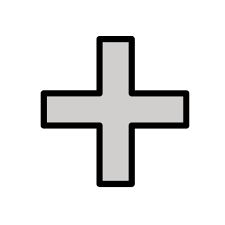
<font color = 'grey'><font size = 2>이러한 활용은 특히, 여러개의 데이터를 합칠 때에 유용하게 활용될 수 있어요. 우리는 "데이터 쿼리" 단원 공부할 때 자세히 학습 할거에요.</font>


In [ ]:
df.T.head(2)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
키워드,헬스장,헬스,벨트,디자인,학과,마네킹,디스플레이,여성,가정용런닝머신,러닝머신,...,손모형,아동마네킹,얼굴마네킹,피노키오마네킹,미니마네킹,목걸이마네킹,유아마네킹,철제마네킹,손마네킹,발마네킹
출처,상품,상품,상품,상품,상품,인기,상품,상품,상품,상품,...,인기,인기,인기,인기,인기,인기,인기,인기,인기,인기


<font color = 'white'><font size = 30>.</font>

# <font size = 4><b>MINI PROJECT 준비하기</b></font>
> # <font size = 4><font color = 'grey'><b>STEP1</b></font>

    데이터를 수집하는 경과가 궁급하다면 하단의 스크래핑 코드를 공부해보아요
    구체적인 데이터 스크레핑 방법은 데이터 심화 학습에서 학습합니다 :)

In [ ]:
#@title <font color = 'grey'><font size = 3><b>Scraping (OUTPUT=FD)</b></font>
search_word = "\uAC8C\uC784 \uC601\uD654 \uAC00\uC694" #@param {type:"string"}
page_range = 17 #@param {type:"integer"}

!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
from IPython import display; display.clear_output()

import time
from tqdm import tqdm

from bs4 import BeautifulSoup
from selenium import webdriver

class dsta_scrap():
    def chr_options():
        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--headless')
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options); display.clear_output()
        return driver 

    def get_urls(qe, max_pg):
        global urlL_FN
        url_Ky = f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={qe}"
        driver = dsta_scrap.chr_options()
        driver.get(url_Ky)

        urlL_FN = []
        for pi in tqdm(range(1, max_pg+1)): 
            p_num = pi
            driver.find_element("xpath", f"/html/body/div[3]/div[2]/div/div[1]/div[2]/div/div/a[{p_num}]").click()

            html = driver.page_source
            soup = BeautifulSoup(html,"html.parser")
            spL = soup.find_all(class_='info', href=True)
            urlL = [x['href'] for x in spL if "n.news.naver" in x['href']]

            urlL_FN.append(urlL)
        return list(set(sum(urlL_FN, [])))    

    def srp(input_url, find_c):
        try:
            driver = dsta_scrap.chr_options()
            driver.get(input_url)

            html = driver.page_source
            soup = BeautifulSoup(html,"html.parser")
            contents = soup.find_all(class_=find_c)[0].text.strip()
        except:
            contents = ''
            pass
        return contents

    def merge_contents(cats, pg_rng):
        dic = {}
        for cat, pgs in zip(cats, pg_rng): 
            contents = []
            for pi in tqdm(dsta_scrap.get_urls(cat, pgs)):
                from IPython import display; display.clear_output()
                y = dsta_scrap.srp(pi, "go_trans _article_content")
                contents.append(y)     
            dic[cat] = contents
        return dic

# scrapping
FD = dsta_scrap.merge_contents(cats=search_word.split(' '), pg_rng=[page_range for _ in range(3)])    
# preprocessing
dic = {}; key_nms = list(FD.keys())
for ki in key_nms:
    small_cont = [x for x in FD[ki] if x != '']; dic[ki] = small_cont;
# data store
root = f'{os.getcwd()}/srp_dtset'; 
if root.split('/')[-1] not in os.listdir(os.getcwd()): os.makedirs(root);
for nmi in key_nms:
    f_path = f'{root}/{nmi}'
    if f_path.split('/')[-1] not in os.listdir(root): os.makedirs(f_path);    

    idx = 1
    for j in tqdm(dic[nmi]):
        with open(f'{f_path}/{nmi}_{idx}.txt', 'wb') as f: pickle.dump(j, f); 
        idx += 1